# Flight price prediction

# Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. 

# The entire data of availability of flights is collected from easemytrip.com using web scrapping tool selenium with New Delhi as a source and Mumbai as a destination. 

# The data is extracted for the duration 05.10.2021 to 13.10.2021

# The target variable is price of a ticket. It is a regression problem.

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
data=pd.read_csv('final flight data.csv')

In [132]:
data

Unnamed: 0  Unnamed: 0.1 journey_date Airline_name source Destination  \
0              0             0   05/10/2021       Indigo  Delhi      Mumbai   
1              1             1   05/10/2021     GO FIRST  Delhi      Mumbai   
2              2             2   05/10/2021     GO FIRST  Delhi      Mumbai   
3              3             3   05/10/2021     GO FIRST  Delhi      Mumbai   
4              4             4   05/10/2021     SpiceJet  Delhi      Mumbai   
5              5             5   05/10/2021       Indigo  Delhi      Mumbai   
6              6             6   05/10/2021       Indigo  Delhi      Mumbai   
7              7             7   05/10/2021       Indigo  Delhi      Mumbai   
8              8             8   05/10/2021       Indigo  Delhi      Mumbai   
9              9             9   05/10/2021       Indigo  Delhi      Mumbai   
10            10            10   05/10/2021       Indigo  Delhi      Mumbai   
11            11            11   05/10/2021       Indigo  Delhi      Mumbai   
12            12            12   05/10/2021       Indigo  Delhi      Mumbai   
13            13            13   05/10/2021     SpiceJet  Delhi      Mumbai   
14            14            14   05/10/2021       Indigo  Delhi      Mumbai   
15            15            15   05/10/2021      Vistara  Delhi      Mumbai   
16            16            16   05/10/2021      Vistara  Delhi      Mumbai   
17            17            17   05/10/2021      Vistara  Delhi      Mumbai   
18            18            18   05/10/2021      Vistara  Delhi      Mumbai   
19            19            19   05/10/2021      Vistara  Delhi      Mumbai   
20            20            20   05/10/2021      Vistara  Delhi      Mumbai   
21            21            21   05/10/2021      Vistara  Delhi      Mumbai   
22            22            22   05/10/2021      Vistara  Delhi      Mumbai   
23            23            23   05/10/2021    Air India  Delhi      Mumbai   
24            24            24   05/10/2021    Air India  Delhi      Mumbai   
25            25            25   05/10/2021    Air India  Delhi      Mumbai   
26            26            26   05/10/2021    Air India  Delhi      Mumbai   
27            27            27   05/10/2021      AirAsia  Delhi      Mumbai   
28            28            28   05/10/2021      AirAsia  Delhi      Mumbai   
29            29            29   05/10/2021      AirAsia  Delhi      Mumbai   
30            30            30   05/10/2021      AirAsia  Delhi      Mumbai   
31            31            31   05/10/2021      AirAsia  Delhi      Mumbai   
32            32            32   05/10/2021      AirAsia  Delhi      Mumbai   
33            33            33   05/10/2021     GO FIRST  Delhi      Mumbai   
34            34            34   05/10/2021     GO FIRST  Delhi      Mumbai   
35            35            35   05/10/2021     GO FIRST  Delhi      Mumbai   
36            36            36   05/10/2021     GO FIRST  Delhi      Mumbai   
37            37            37   05/10/2021     GO FIRST  Delhi      Mumbai   
38            38            38   05/10/2021     GO FIRST  Delhi      Mumbai   
39            39            39   05/10/2021     GO FIRST  Delhi      Mumbai   
40            40            40   05/10/2021     GO FIRST  Delhi      Mumbai   
41            41            41   05/10/2021     GO FIRST  Delhi      Mumbai   
42            42            42   05/10/2021     GO FIRST  Delhi      Mumbai   
43            43            43   05/10/2021     GO FIRST  Delhi      Mumbai   
44            44            44   05/10/2021    Air India  Delhi      Mumbai   
45            45            45   05/10/2021    Air India  Delhi      Mumbai   
46            46            46   05/10/2021       Indigo  Delhi      Mumbai   
47            47            47   05/10/2021       Indigo  Delhi      Mumbai   
48            48            48   05/10/2021       Indigo  Delhi      Mumbai   
49            49            49   05/10/2021       Indigo

In [133]:
df=pd.DataFrame(data)

In [134]:
df

Unnamed: 0  Unnamed: 0.1 journey_date Airline_name source Destination  \
0              0             0   05/10/2021       Indigo  Delhi      Mumbai   
1              1             1   05/10/2021     GO FIRST  Delhi      Mumbai   
2              2             2   05/10/2021     GO FIRST  Delhi      Mumbai   
3              3             3   05/10/2021     GO FIRST  Delhi      Mumbai   
4              4             4   05/10/2021     SpiceJet  Delhi      Mumbai   
5              5             5   05/10/2021       Indigo  Delhi      Mumbai   
6              6             6   05/10/2021       Indigo  Delhi      Mumbai   
7              7             7   05/10/2021       Indigo  Delhi      Mumbai   
8              8             8   05/10/2021       Indigo  Delhi      Mumbai   
9              9             9   05/10/2021       Indigo  Delhi      Mumbai   
10            10            10   05/10/2021       Indigo  Delhi      Mumbai   
11            11            11   05/10/2021       Indigo  Delhi      Mumbai   
12            12            12   05/10/2021       Indigo  Delhi      Mumbai   
13            13            13   05/10/2021     SpiceJet  Delhi      Mumbai   
14            14            14   05/10/2021       Indigo  Delhi      Mumbai   
15            15            15   05/10/2021      Vistara  Delhi      Mumbai   
16            16            16   05/10/2021      Vistara  Delhi      Mumbai   
17            17            17   05/10/2021      Vistara  Delhi      Mumbai   
18            18            18   05/10/2021      Vistara  Delhi      Mumbai   
19            19            19   05/10/2021      Vistara  Delhi      Mumbai   
20            20            20   05/10/2021      Vistara  Delhi      Mumbai   
21            21            21   05/10/2021      Vistara  Delhi      Mumbai   
22            22            22   05/10/2021      Vistara  Delhi      Mumbai   
23            23            23   05/10/2021    Air India  Delhi      Mumbai   
24            24            24   05/10/2021    Air India  Delhi      Mumbai   
25            25            25   05/10/2021    Air India  Delhi      Mumbai   
26            26            26   05/10/2021    Air India  Delhi      Mumbai   
27            27            27   05/10/2021      AirAsia  Delhi      Mumbai   
28            28            28   05/10/2021      AirAsia  Delhi      Mumbai   
29            29            29   05/10/2021      AirAsia  Delhi      Mumbai   
30            30            30   05/10/2021      AirAsia  Delhi      Mumbai   
31            31            31   05/10/2021      AirAsia  Delhi      Mumbai   
32            32            32   05/10/2021      AirAsia  Delhi      Mumbai   
33            33            33   05/10/2021     GO FIRST  Delhi      Mumbai   
34            34            34   05/10/2021     GO FIRST  Delhi      Mumbai   
35            35            35   05/10/2021     GO FIRST  Delhi      Mumbai   
36            36            36   05/10/2021     GO FIRST  Delhi      Mumbai   
37            37            37   05/10/2021     GO FIRST  Delhi      Mumbai   
38            38            38   05/10/2021     GO FIRST  Delhi      Mumbai   
39            39            39   05/10/2021     GO FIRST  Delhi      Mumbai   
40            40            40   05/10/2021     GO FIRST  Delhi      Mumbai   
41            41            41   05/10/2021     GO FIRST  Delhi      Mumbai   
42            42            42   05/10/2021     GO FIRST  Delhi      Mumbai   
43            43            43   05/10/2021     GO FIRST  Delhi      Mumbai   
44            44            44   05/10/2021    Air India  Delhi      Mumbai   
45            45            45   05/10/2021    Air India  Delhi      Mumbai   
46            46            46   05/10/2021       Indigo  Delhi      Mumbai   
47            47            47   05/10/2021       Indigo  Delhi      Mumbai   
48            48            48   05/10/2021       Indigo  Delhi      Mumbai   
49            49            49   05/10/2021       Indigo

In [135]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [136]:
df.drop('Unnamed: 0.1',axis=1,inplace=True)

In [137]:
df

journey_date Airline_name source Destination departure_time arrival_time  \
0      05/10/2021       Indigo  Delhi      Mumbai          06:05        12:35   
1      05/10/2021     GO FIRST  Delhi      Mumbai          09:40        11:45   
2      05/10/2021     GO FIRST  Delhi      Mumbai          18:40        20:45   
3      05/10/2021     GO FIRST  Delhi      Mumbai          22:45        00:50   
4      05/10/2021     SpiceJet  Delhi      Mumbai          18:40        20:40   
5      05/10/2021       Indigo  Delhi      Mumbai          12:00        14:05   
6      05/10/2021       Indigo  Delhi      Mumbai          14:00        16:05   
7      05/10/2021       Indigo  Delhi      Mumbai          20:30        22:35   
8      05/10/2021       Indigo  Delhi      Mumbai          06:10        08:20   
9      05/10/2021       Indigo  Delhi      Mumbai          08:55        11:05   
10     05/10/2021       Indigo  Delhi      Mumbai          21:55        00:05   
11     05/10/2021       Indigo  Delhi      Mumbai          10:10        12:25   
12     05/10/2021       Indigo  Delhi      Mumbai          15:35        17:50   
13     05/10/2021     SpiceJet  Delhi      Mumbai          20:20        22:40   
14     05/10/2021       Indigo  Delhi      Mumbai          17:45        20:10   
15     05/10/2021      Vistara  Delhi      Mumbai          12:45        14:55   
16     05/10/2021      Vistara  Delhi      Mumbai          15:30        17:40   
17     05/10/2021      Vistara  Delhi      Mumbai          16:55        19:05   
18     05/10/2021      Vistara  Delhi      Mumbai          10:20        12:35   
19     05/10/2021      Vistara  Delhi      Mumbai          19:45        22:00   
20     05/10/2021      Vistara  Delhi      Mumbai          08:50        11:10   
21     05/10/2021      Vistara  Delhi      Mumbai          17:45        20:05   
22     05/10/2021      Vistara  Delhi      Mumbai          18:55        21:15   
23     05/10/2021    Air India  Delhi      Mumbai          07:00        09:05   
24     05/10/2021    Air India  Delhi      Mumbai          10:15        12:25   
25     05/10/2021    Air India  Delhi      Mumbai          20:00        22:10   
26     05/10/2021    Air India  Delhi      Mumbai          19:00        21:15   
27     05/10/2021      AirAsia  Delhi      Mumbai          12:40        20:15   
28     05/10/2021      AirAsia  Delhi      Mumbai          11:55        20:15   
29     05/10/2021      AirAsia  Delhi      Mumbai          08:00        16:35   
30     05/10/2021      AirAsia  Delhi      Mumbai          18:35        06:20   
31     05/10/2021      AirAsia  Delhi      Mumbai          16:15        06:20   
32     05/10/2021      AirAsia  Delhi      Mumbai          05:20        20:15   
33     05/10/2021     GO FIRST  Delhi      Mumbai          08:10        13:00   
34     05/10/2021     GO FIRST  Delhi      Mumbai          16:10        21:05   
35     05/10/2021     GO FIRST  Delhi      Mumbai          10:40        15:40   
36     05/10/2021     GO FIRST  Delhi      Mumbai          12:20        18:15   
37     05/10/2021     GO FIRST  Delhi      Mumbai          08:10        14:55   
38     05/10/2021     GO FIRST  Delhi      Mumbai          11:20        18:15   
39     05/10/2021     GO FIRST  Delhi      Mumbai          08:10        15:40   
40     05/10/2021     GO FIRST  Delhi      Mumbai          09:10        18:15   
41     05/10/2021     GO FIRST  Delhi      Mumbai          07:25        18:15   
42     05/10/2021     GO FIRST  Delhi      Mumbai          08:40        22:00   
43     05/10/2021     GO FIRST  Delhi      Mumbai          20:20        09:55   
44     05/10/2021    Air India  Delhi      Mumbai          15:05        18:15   
45     05/10/2021    Air India  Delhi      Mumbai          18:00        21:35   
46     05/10/2021       Indigo  Delhi      Mumbai          13:45        17:45   
47     05/10/2021       Indigo  Delhi      Mumbai          18:45        23:00   
48     05/10/2021       Indigo  Delh

In [138]:
df.shape

(1796, 9)

The dataset is having 1796 records and 9 features with price being the target/label feature.

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   journey_date    1796 non-null   object
 1   Airline_name    1796 non-null   object
 2   source          1796 non-null   object
 3   Destination     1796 non-null   object
 4   departure_time  1796 non-null   object
 5   arrival_time    1796 non-null   object
 6   Duration        1796 non-null   object
 7   total_stops     1796 non-null   object
 8   Price           1796 non-null   object
dtypes: object(9)
memory usage: 126.4+ KB


All the features in this dataset are of object datatype.

In [140]:
df.isnull().sum()

journey_date      0
Airline_name      0
source            0
Destination       0
departure_time    0
arrival_time      0
Duration          0
total_stops       0
Price             0
dtype: int64

There are no null values present in this dataset.

<AxesSubplot:>

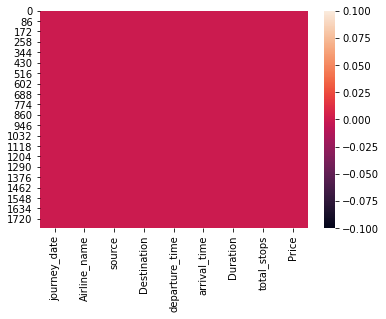

In [141]:
sns.heatmap(df.isnull())

From the heatmap it can be said there are no null values present.

In [142]:
df['Price']=df['Price'].apply(lambda x:' '.join(term for term in x.split(',')))

In [143]:
df['Price']=df['Price'].apply(lambda x:''.join(term for term in x.split()))

In [144]:
df['Price']=df['Price'].astype('int')

In [145]:
df['journey_date'].value_counts()

12/10/2021    218
13/10/2021    218
11/10/2021    217
10/10/2021    204
09/10/2021    202
06/10/2021    190
08/10/2021    188
07/10/2021    188
05/10/2021    171
Name: journey_date, dtype: int64

 The maximum flights i.e 218 from delhi to Mumbai are available on 12.10.2021 and 13.10.2021.

Text(0, 0.5, 'Price of ticket')

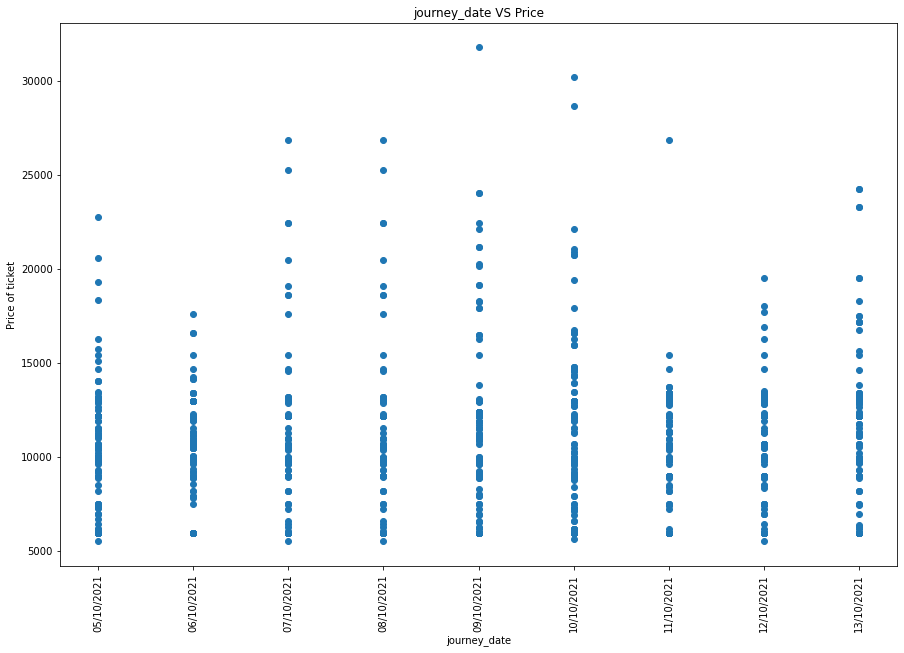

In [146]:
plt.figure(figsize = (15, 10))
plt.title('journey_date VS Price')
plt.scatter(df['journey_date'], df['Price'])
plt.xticks(rotation = 90)
plt.xlabel('journey_date')
plt.ylabel('Price of ticket')

In [147]:
pd.crosstab(df['journey_date'],df['Price'],margins=True)

Price         5496  5607  5953  5954  5955  5956  6060  6165  6166  6271  ...  \
journey_date                                                              ...   
05/10/2021       1     0     6    14    42     0     1     3     0     0  ...   
06/10/2021       0     0     5    18    55     0     0     0     0     0  ...   
07/10/2021       1     0     8    18    58     0     1     0     0     1  ...   
08/10/2021       1     0     8    18    58     0     1     0     0     1  ...   
09/10/2021       0     0     4    25    58     0     0     0     1     1  ...   
10/10/2021       0     1     6    23    46     1     0     5     0     0  ...   
11/10/2021       0     0    10    32    63     1     0     0     1     0  ...   
12/10/2021       1     0    11    33    61     1     0     0     1     0  ...   
13/10/2021       0     0    10    32    57     1     0     0     1     1  ...   
All              4     1    68   213   498     4     3     8     4     4  ...   

Price         22755  23281  24015  24225  25275  26850  28635  30210  31785  \
journey_date                                                                  
05/10/2021        1      0      0      0      0      0      0      0      0   
06/10/2021        0      0      0      0      0      0      0      0      0   
07/10/2021        0      0      0      0      1      1      0      0      0   
08/10/2021        0      0      0      0      1      1      0      0      0   
09/10/2021        0      0      2      0      0      0      0      0      1   
10/10/2021        0      0      0      0      0      0      1      1      0   
11/10/2021        0      0      0      0      0      1      0      0      0   
12/10/2021        0      0      0      0      0      0      0      0      0   
13/10/2021        0      2      0      2      0      0      0      0      0   
All               1      2      2      2      2      3      1      1      1   

Price          All  
journey_date        
05/10/2021     171  
06/10/2021     190  
07/10/2021     188  
08/10/2021     188  
09/10/2021     202  
10/10/2021     204  
11/10/2021     217  
12/10/2021     218  
13/10/2021     218  
All           1796  

[10 rows x 179 columns]

The flight fare of one the airlines is highest i.e 31785 Rs on dated 09.10.2021 and least flight fare is 5496 on 05.10.2021,07.10.2021,08.10.2021 and 12.10.2021.

In [148]:
df['Airline_name'].value_counts()

Vistara      522
Air India    462
Indigo       362
GO FIRST     264
SpiceJet      99
AirAsia       87
Name: Airline_name, dtype: int64

The maximum flights i.e 522 from Delhi to Mumbai are of Vistara and the least flights are of AirAsia.

Text(0, 0.5, 'Count of flights')

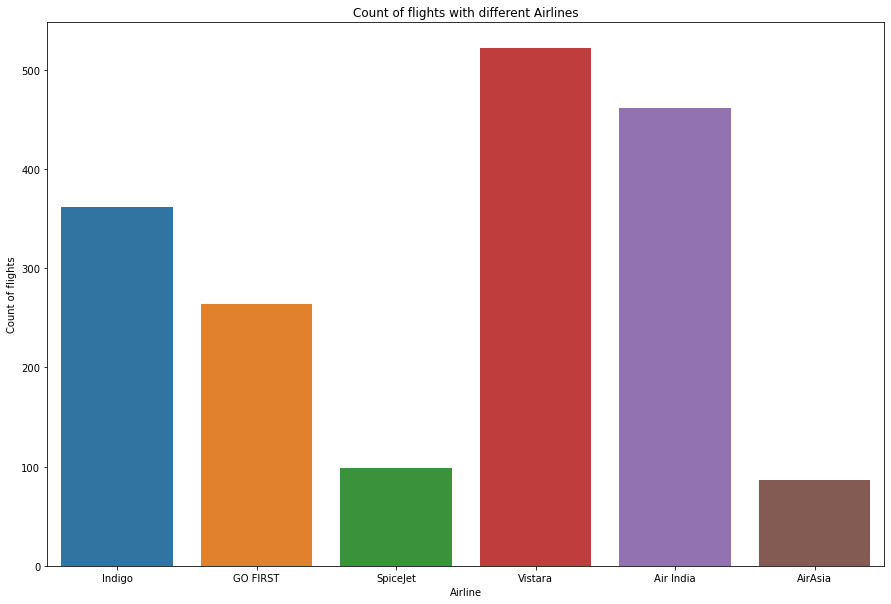

In [149]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline_name', data =df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')

Vistara is having better connectivity of flights from Delhi to Mumbai as compared to other Airlines.

Text(0, 0.5, 'Price of ticket')

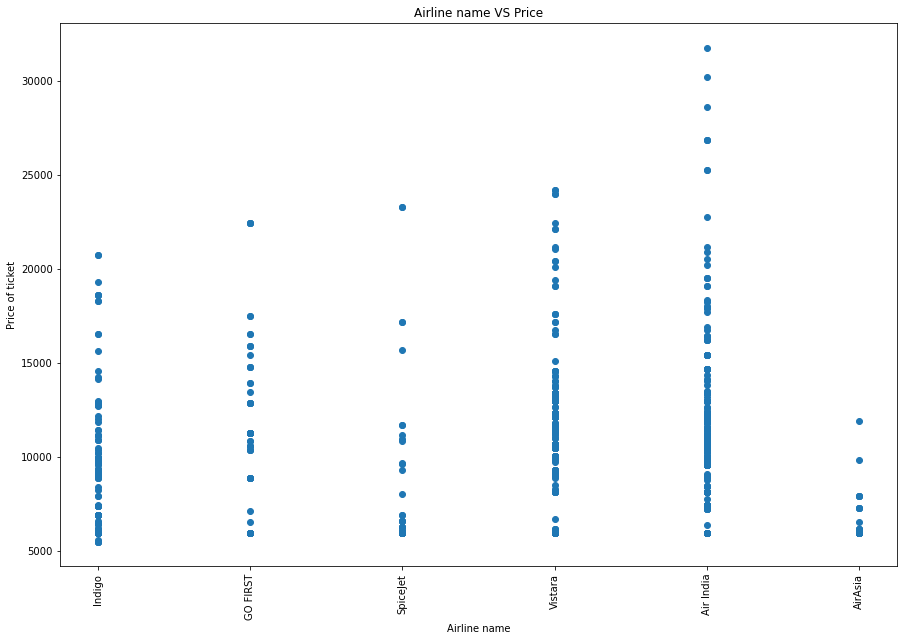

In [150]:
plt.figure(figsize = (15, 10))
plt.title('Airline name VS Price')
plt.scatter(df['Airline_name'], df['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline name')
plt.ylabel('Price of ticket')

The highest flight fare of Rs 31785 is of Airindia.

In [151]:
pd.crosstab(df['Airline_name'],df['Price'],margins=True)

Price         5496  5607  5953  5954  5955  5956  6060  6165  6166  6271  ...  \
Airline_name                                                              ...   
Air India        0     0     0     0    63     0     0     0     0     0  ...   
AirAsia          0     0    68     0     0     4     0     0     4     0  ...   
GO FIRST         0     0     0   213     0     0     0     0     0     0  ...   
Indigo           4     1     0     0   260     0     0     5     0     0  ...   
SpiceJet         0     0     0     0    72     0     3     0     0     4  ...   
Vistara          0     0     0     0   103     0     0     3     0     0  ...   
All              4     1    68   213   498     4     3     8     4     4  ...   

Price         22755  23281  24015  24225  25275  26850  28635  30210  31785  \
Airline_name                                                                  
Air India         1      0      0      0      2      3      1      1      1   
AirAsia           0      0      0      0      0      0      0      0      0   
GO FIRST          0      0      0      0      0      0      0      0      0   
Indigo            0      0      0      0      0      0      0      0      0   
SpiceJet          0      2      0      0      0      0      0      0      0   
Vistara           0      0      2      2      0      0      0      0      0   
All               1      2      2      2      2      3      1      1      1   

Price          All  
Airline_name        
Air India      462  
AirAsia         87  
GO FIRST       264  
Indigo         362  
SpiceJet        99  
Vistara        522  
All           1796  

[7 rows x 179 columns]

The least fare of Rs 5496 is of  indigo airlines. 

The flight fare is Rs 5955 for 72% of the records(260 out of 362)pertaining to indigo airlines.

The flight fare is Rs 5954 for 81% of the records (213 out of 264)pertaining to GO first airlines.

The flight fare is Rs 5953 for 78% of the records (68 out of 87)pertaining to AirAsia.

As most of the records(78%) for Airasia is having flight price of Rs 5953 so it can be said that airasia is cheapest as compared to others.

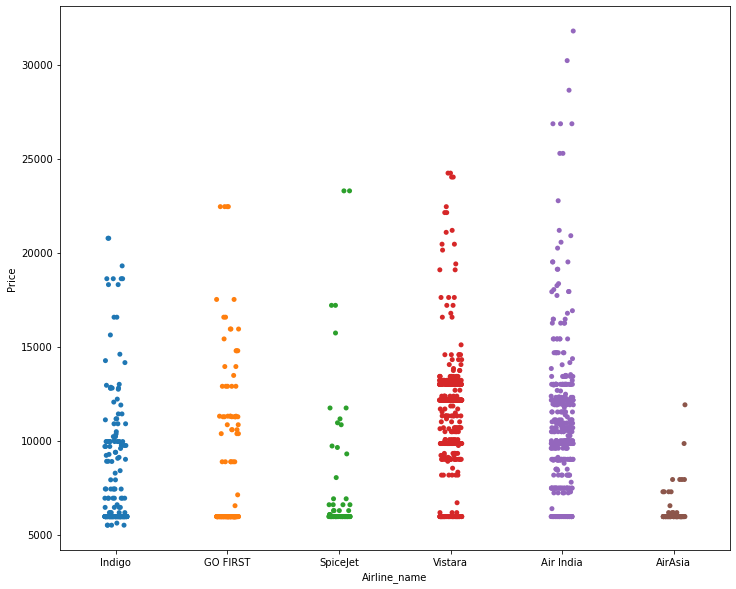

In [152]:
plt.figure(figsize=[12,10])
sns.stripplot(x='Airline_name',y='Price',data=df)
plt.show()

In [153]:
df[[df['Airline_name']=='Air India']and df['Price']>25000]

journey_date Airline_name source Destination departure_time arrival_time  \
547    07/10/2021    Air India  Delhi      Mumbai          20:15        12:25   
548    07/10/2021    Air India  Delhi      Mumbai          16:55        12:25   
735    08/10/2021    Air India  Delhi      Mumbai          20:15        12:25   
736    08/10/2021    Air India  Delhi      Mumbai          16:55        12:25   
938    09/10/2021    Air India  Delhi      Mumbai          20:15        16:45   
1141   10/10/2021    Air India  Delhi      Mumbai          20:15        12:25   
1142   10/10/2021    Air India  Delhi      Mumbai          16:55        12:25   
1359   11/10/2021    Air India  Delhi      Mumbai          07:00        19:45   

     Duration total_stops  Price  
547   16h 10m      1-stop  25275  
548   19h 30m      1-stop  26850  
735   16h 10m      1-stop  25275  
736   19h 30m      1-stop  26850  
938   20h 30m      1-stop  31785  
1141  16h 10m      1-stop  28635  
1142  19h 30m      1-stop  30210  
1359  12h 45m      1-stop  26850

There are in total 8 records for Air india having flight fare of Rs 25000 and above.

In [155]:
df[df['Price']>20000].count()

journey_date      33
Airline_name      33
source            33
Destination       33
departure_time    33
arrival_time      33
Duration          33
total_stops       33
Price             33
dtype: int64

In [156]:
pd.crosstab(df['Airline_name'],df['Price']>20000,margins=True)

Price         False  True   All
Airline_name                   
Air India       449    13   462
AirAsia          87     0    87
GO FIRST        260     4   264
Indigo          360     2   362
SpiceJet         97     2    99
Vistara         510    12   522
All            1763    33  1796

There are in total 33 records in this dataset having flight fare of Rs 20000 and above out of which air india is having highest records i.e 13 and least are for Indigo and Spicejet.

AirAsia is not having any record for the ticket above 20000 Rs.

In [157]:
df['depart_hour']=pd.to_datetime(df['departure_time']).dt.hour

In [158]:
df['depart_min']=pd.to_datetime(df['departure_time']).dt.minute

I have extracted Dep_hour and Dep_min from departure_time. I have dropped departure_time feature after extracting data.

In [159]:
df.drop('departure_time',axis=1,inplace=True)

In [160]:
df

journey_date Airline_name source Destination arrival_time Duration  \
0      05/10/2021       Indigo  Delhi      Mumbai        12:35  06h 30m   
1      05/10/2021     GO FIRST  Delhi      Mumbai        11:45  02h 05m   
2      05/10/2021     GO FIRST  Delhi      Mumbai        20:45  02h 05m   
3      05/10/2021     GO FIRST  Delhi      Mumbai        00:50  02h 05m   
4      05/10/2021     SpiceJet  Delhi      Mumbai        20:40  02h 00m   
5      05/10/2021       Indigo  Delhi      Mumbai        14:05  02h 05m   
6      05/10/2021       Indigo  Delhi      Mumbai        16:05  02h 05m   
7      05/10/2021       Indigo  Delhi      Mumbai        22:35  02h 05m   
8      05/10/2021       Indigo  Delhi      Mumbai        08:20  02h 10m   
9      05/10/2021       Indigo  Delhi      Mumbai        11:05  02h 10m   
10     05/10/2021       Indigo  Delhi      Mumbai        00:05  02h 10m   
11     05/10/2021       Indigo  Delhi      Mumbai        12:25  02h 15m   
12     05/10/2021       Indigo  Delhi      Mumbai        17:50  02h 15m   
13     05/10/2021     SpiceJet  Delhi      Mumbai        22:40  02h 20m   
14     05/10/2021       Indigo  Delhi      Mumbai        20:10  02h 25m   
15     05/10/2021      Vistara  Delhi      Mumbai        14:55  02h 10m   
16     05/10/2021      Vistara  Delhi      Mumbai        17:40  02h 10m   
17     05/10/2021      Vistara  Delhi      Mumbai        19:05  02h 10m   
18     05/10/2021      Vistara  Delhi      Mumbai        12:35  02h 15m   
19     05/10/2021      Vistara  Delhi      Mumbai        22:00  02h 15m   
20     05/10/2021      Vistara  Delhi      Mumbai        11:10  02h 20m   
21     05/10/2021      Vistara  Delhi      Mumbai        20:05  02h 20m   
22     05/10/2021      Vistara  Delhi      Mumbai        21:15  02h 20m   
23     05/10/2021    Air India  Delhi      Mumbai        09:05  02h 05m   
24     05/10/2021    Air India  Delhi      Mumbai        12:25  02h 10m   
25     05/10/2021    Air India  Delhi      Mumbai        22:10  02h 10m   
26     05/10/2021    Air India  Delhi      Mumbai        21:15  02h 15m   
27     05/10/2021      AirAsia  Delhi      Mumbai        20:15  07h 35m   
28     05/10/2021      AirAsia  Delhi      Mumbai        20:15  08h 20m   
29     05/10/2021      AirAsia  Delhi      Mumbai        16:35  08h 35m   
30     05/10/2021      AirAsia  Delhi      Mumbai        06:20  11h 45m   
31     05/10/2021      AirAsia  Delhi      Mumbai        06:20  14h 05m   
32     05/10/2021      AirAsia  Delhi      Mumbai        20:15  14h 55m   
33     05/10/2021     GO FIRST  Delhi      Mumbai        13:00  04h 50m   
34     05/10/2021     GO FIRST  Delhi      Mumbai        21:05  04h 55m   
35     05/10/2021     GO FIRST  Delhi      Mumbai        15:40  05h 00m   
36     05/10/2021     GO FIRST  Delhi      Mumbai        18:15  05h 55m   
37     05/10/2021     GO FIRST  Delhi      Mumbai        14:55  06h 45m   
38     05/10/2021     GO FIRST  Delhi      Mumbai        18:15  06h 55m   
39     05/10/2021     GO FIRST  Delhi      Mumbai        15:40  07h 30m   
40     05/10/2021     GO FIRST  Delhi      Mumbai        18:15  09h 05m   
41     05/10/2021     GO FIRST  Delhi      Mumbai        18:15  10h 50m   
42     05/10/2021     GO FIRST  Delhi      Mumbai        22:00  13h 20m   
43     05/10/2021     GO FIRST  Delhi      Mumbai        09:55  13h 35m   
44     05/10/2021    Air India  Delhi      Mumbai        18:15  03h 10m   
45     05/10/2021    Air India  Delhi      Mumbai        21:35  03h 35m   
46     05/10/2021       Indigo  Delhi      Mumbai        17:45  04h 00m   
47     05/10/2021       Indigo  Delhi      Mumbai        23:00  04h 15m   
48     05/10/2021       Indigo  Delhi      Mumbai        18:35  04h 55m   
49     05/10/2021       Indigo  Delhi      Mumbai        14:50  05h 15m   
50     05/10/2021       Indigo  Delhi      Mumbai        18:35  05h 25m   
51     05/10/2021       Indigo  Delhi      Mumbai        13:10  05h 50m   
52     05/10/2021       Indigo

Text(0, 0.5, 'Price of ticket')

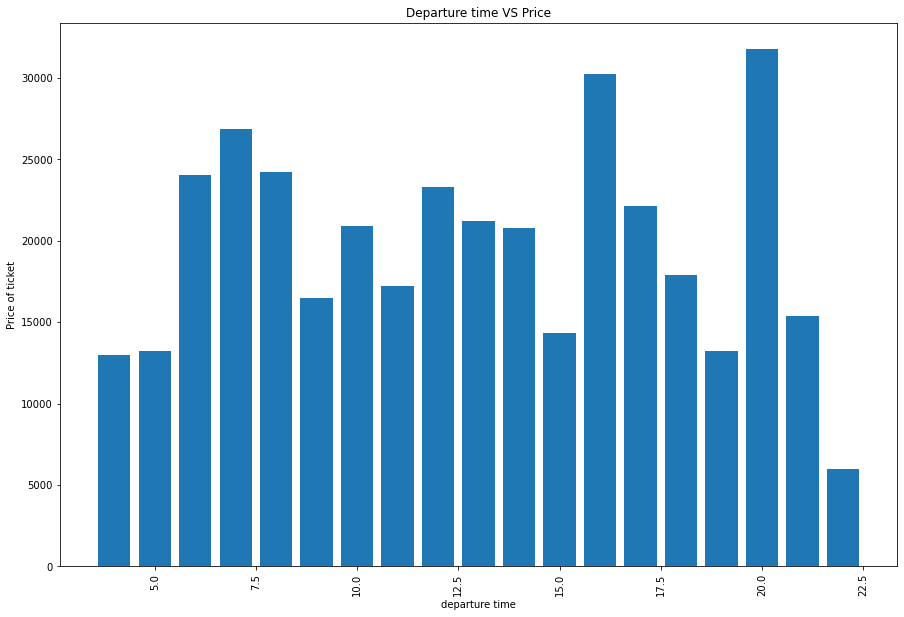

In [161]:
plt.figure(figsize = (15, 10))
plt.title('Departure time VS Price')
plt.bar(df['depart_hour'], df['Price'])
plt.xticks(rotation = 90)
plt.xlabel('departure time')
plt.ylabel('Price of ticket')

In [162]:
pd.crosstab(df['depart_hour'],df['Price'],margins=True)

Price        5496  5607  5953  5954  5955  5956  6060  6165  6166  6271  ...  \
depart_hour                                                              ...   
4               0     0     3     0     0     0     0     0     0     0  ...   
5               0     0    11    12     4     0     0     0     4     0  ...   
6               4     1     0    13    38     0     1     0     0     0  ...   
7               0     0     0     5    25     0     0     0     0     0  ...   
8               0     0    13    40    44     0     0     0     0     0  ...   
9               0     0     4    18    54     0     0     1     0     0  ...   
10              0     0     0    20    41     0     0     0     0     0  ...   
11              0     0     8     9    17     0     0     0     0     0  ...   
12              0     0     8    13    32     0     0     0     0     2  ...   
13              0     0     0     5    41     0     0     0     0     0  ...   
14              0     0     0     6    19     0     0     0     0     0  ...   
15              0     0     0     6    21     0     0     1     0     0  ...   
16              0     0     9    10    23     0     0     0     0     1  ...   
17              0     0     0     6    25     0     0     1     0     0  ...   
18              0     0     8     9    42     0     2     0     0     1  ...   
19              0     0     0    13    26     4     0     3     0     0  ...   
20              0     0     0    11    34     0     0     2     0     0  ...   
21              0     0     4    12    12     0     0     0     0     0  ...   
22              0     0     0     5     0     0     0     0     0     0  ...   
All             4     1    68   213   498     4     3     8     4     4  ...   

Price        22755  23281  24015  24225  25275  26850  28635  30210  31785  \
depart_hour                                                                  
4                0      0      0      0      0      0      0      0      0   
5                0      0      0      0      0      0      0      0      0   
6                0      0      1      0      0      0      0      0      0   
7                0      0      1      0      0      1      0      0      0   
8                0      0      0      2      0      0      0      0      0   
9                0      0      0      0      0      0      0      0      0   
10               0      0      0      0      0      0      0      0      0   
11               0      0      0      0      0      0      0      0      0   
12               0      2      0      0      0      0      0      0      0   
13               0      0      0      0      0      0      0      0      0   
14               0      0      0      0      0      0      0      0      0   
15               0      0      0      0      0      0      0      0      0   
16               1      0      0      0      0      2      0      1      0   
17               0      0      0      0      0      0      0      0      0   
18               0      0      0      0      0      0      0      0      0   
19               0      0      0      0      0      0      0      0      0   
20               0      0      0      0      2      0      1      0      1   
21               0      0      0      0      0      0      0      0      0   
22               0      0      0      0      0      0      0      0      0   
All              1      2      2      2      2      3      1      1      1   

Price         All  
depart_hour        
4              10  
5              66  
6             107  
7              90  
8             188  
9             134  
10            100  
11             50  
12            121  
13            133  
14             94  
15             39  
16            115  
17            134  
18             84  
19             93  
20            160  
21             73  
22              5  
All          1796  

[20 rows x 179 columns]

5 flights are available with departure time of 10 pm and all of them are having same flight fare of 5954 Rs.

The flights with departure time i.e red eye flights early in the morning from 5 am to 6am are comparatively cheaper. Further, the flight fare is below 6000 Rs for 52%(56 out of 107) of the records having departure time 6 am.

188 flights are there with departure time of 8 am from source i.e Delhi. Further, as number of flights are more it can be said it is a peak time for travelling.

One of the flight having departure time of 8 pm is costliest where the fare is 31785 Rs.

5496 Rs is the lowest fare for the flights(4 in number) with departure time of 6 am.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Price of ticket')

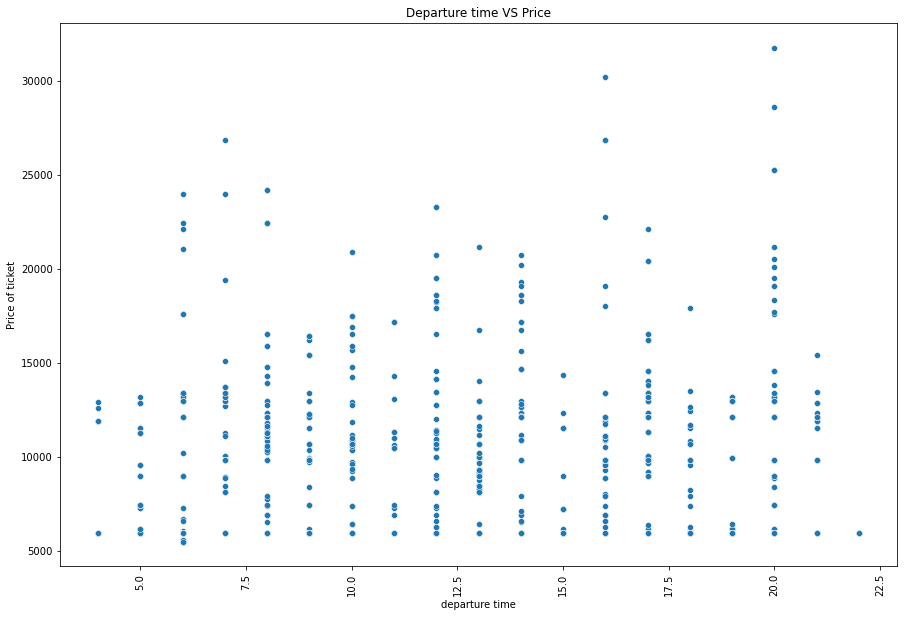

In [163]:
plt.figure(figsize = (15, 10))
plt.title('Departure time VS Price')
sns.scatterplot(df['depart_hour'], df['Price'])
plt.xticks(rotation = 90)
plt.xlabel('departure time')
plt.ylabel('Price of ticket')

There are no flights available after 11 pm from source location.

The frequency of flights reduces drastically from source location after 9 pm indicating non peak hours for travelling.

In [164]:
df['arrival_hour']=pd.to_datetime(df['arrival_time']).dt.hour

In [165]:
df['arrival_minute']=pd.to_datetime(df['arrival_time']).dt.minute

Extracting out arrival_hour and arrival_minute from arrival_time and dropping feature arrival_time after the information is extracted.

In [166]:
df.drop('arrival_time',axis=1,inplace=True)

Text(0, 0.5, 'Price of ticket')

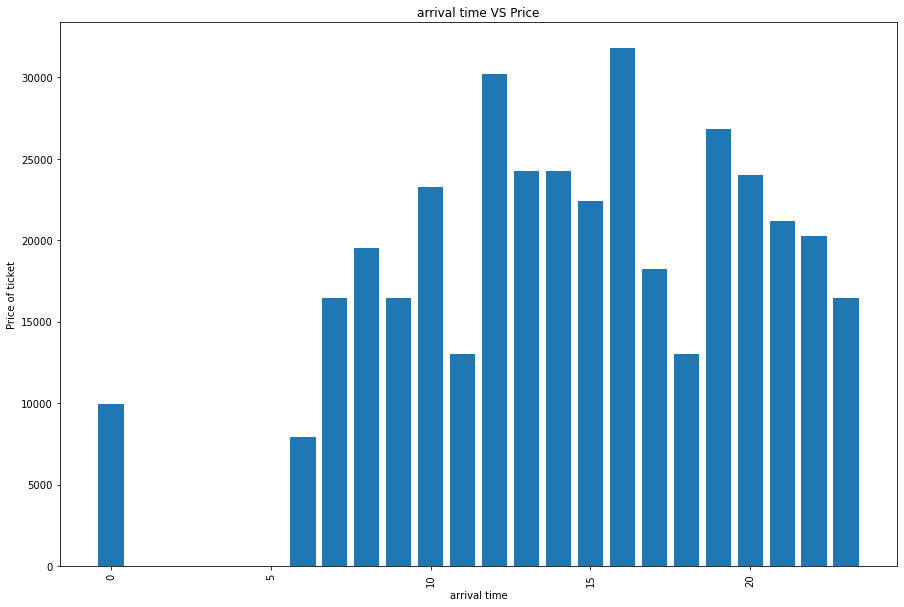

In [167]:
plt.figure(figsize = (15, 10))
plt.title('arrival time VS Price')
plt.bar(df['arrival_hour'], df['Price'])
plt.xticks(rotation = 90)
plt.xlabel('arrival time')
plt.ylabel('Price of ticket')

There are no flights arriving at destination i.e Mumbai in your case between 12:30 pm to 5 am.

In [168]:
pd.crosstab(df['arrival_hour'],df['Price'],margins=True)

Price         5496  5607  5953  5954  5955  5956  6060  6165  6166  6271  ...  \
arrival_hour                                                              ...   
0                0     0     0     5    13     0     0     0     0     0  ...   
6                0     0    14     0     0     0     0     0     0     0  ...   
7                0     0     0    12     4     0     0     0     0     0  ...   
8                0     0     0    11    17     0     0     0     0     0  ...   
9                0     0     0     6    23     0     1     0     0     0  ...   
10               0     0     0     1    24     0     0     0     0     3  ...   
11               0     0     4     9    34     0     0     1     0     0  ...   
12               4     1     0     0    27     0     0     0     0     0  ...   
13               0     0     0    11    27     0     0     0     0     0  ...   
14               0     0     7     5    45     0     0     0     0     0  ...   
15               0     0     0    20    14     0     0     0     0     0  ...   
16               0     0    12     8    17     0     0     0     0     1  ...   
17               0     0     0    14    58     0     0     1     0     0  ...   
18               0     0     0    37    24     0     0     0     0     0  ...   
19               0     0     0    17    29     0     0     0     0     0  ...   
20               0     0    23     9    28     0     2     1     0     0  ...   
21               0     0     0     9    42     0     0     2     0     0  ...   
22               0     0     8    28    49     4     0     2     4     0  ...   
23               0     0     0    11    23     0     0     1     0     0  ...   
All              4     1    68   213   498     4     3     8     4     4  ...   

Price         22755  23281  24015  24225  25275  26850  28635  30210  31785  \
arrival_hour                                                                  
0                 0      0      0      0      0      0      0      0      0   
6                 0      0      0      0      0      0      0      0      0   
7                 0      0      0      0      0      0      0      0      0   
8                 0      0      0      0      0      0      0      0      0   
9                 0      0      0      0      0      0      0      0      0   
10                0      1      0      0      0      0      0      0      0   
11                0      0      0      0      0      0      0      0      0   
12                1      0      0      0      2      2      1      1      0   
13                0      1      0      1      0      0      0      0      0   
14                0      0      0      1      0      0      0      0      0   
15                0      0      0      0      0      0      0      0      0   
16                0      0      0      0      0      0      0      0      1   
17                0      0      0      0      0      0      0      0      0   
18                0      0      0      0      0      0      0      0      0   
19                0      0      0      0      0      1      0      0      0   
20                0      0      2      0      0      0      0      0      0   
21                0      0      0      0      0      0      0      0      0   
22                0      0      0      0      0      0      0      0      0   
23                0      0      0      0      0      0      0      0      0   
All               1      2      2      2      2      3      1      1      1   

Price          All  
arrival_hour        
0               28  
6               17  
7               45  
8               89  
9               84  
10              91  
11              82  
12              67  
13             109  
14              93  
15             111  
16             106  
17             133  
18              94  
19              86  
20             141  
21             135  
22             123  
23             162  
All           1796  

[20 rows x 179 

162 flights are having arrival time of 4pm at destination.

17 flights are having arrival time of 6 am at destination which points out to the fact that the frequency of the flights reduces drastically from source after 8 pm.

 The flight fare is below 6000 Rs for 82%(14 out of 17) of the records having arrival time 6 am.

In [169]:
df['Duration'].value_counts()

02h 05m    105
02h 10m     93
02h 15m     72
02h 20m     40
05h 00m     31
05h 50m     29
23h 50m     29
05h 55m     27
02h 00m     26
13h 40m     26
05h 25m     25
06h 45m     24
11h 45m     23
13h 35m     21
06h 05m     20
06h 35m     19
14h 05m     18
04h 25m     18
05h 40m     18
04h 55m     18
06h 50m     18
06h 10m     17
05h 15m     17
10h 15m     17
14h 55m     17
13h 20m     17
04h 15m     17
08h 35m     16
07h 35m     16
05h 30m     16
16h 55m     16
09h 35m     16
05h 45m     15
06h 55m     14
06h 00m     14
05h 05m     14
11h 20m     14
06h 15m     14
06h 30m     13
09h 20m     12
07h 15m     12
14h 45m     12
15h 45m     12
07h 40m     12
12h 25m     12
24h 15m     11
26h 40m     11
07h 30m     11
04h 00m     11
12h 50m     11
08h 20m     10
15h 55m     10
26h 45m     10
11h 05m     10
08h 15m     10
03h 35m     10
07h 10m     10
18h 55m     10
19h 30m     10
07h 55m      9
02h 25m      9
14h 25m      9
14h 00m      9
15h 35m      9
15h 50m      9
20h 35m      9
04h 45m   

In [170]:
df2=df.copy()

In [171]:
df2['Duration']=df2['Duration'].replace({'02h 05m':'2h 5m','02h 00m':'2h','02h 10m':'2h 10m','02h 15m':'2h 15m','02h 20m':'2h 20m'})
                                        

In [172]:
df2['Duration']=df2['Duration'].replace({'02h 25m':'2h 25m','03h 10m':'3h 10m','03h 35m':'3h 35m','03h 45m':'3h 45m','03h 50m':'3h 50m',
                                         '03h 55m':'3h 55m'})

In [173]:
df2['Duration']=df2['Duration'].replace({'04h 00m':'4h','04h 15m':'4h 15m','04h 25m':'4h 25m','04h 30m':'4h 30m','04h 40m':'4h 40m',
                                        '04h 45m':'4h 45m','04h 50m':'4h 50m','04h 55m':'4h 55m'})

In [174]:
df2['Duration']=df2['Duration'].replace({'05h 00m':'5h','05h 05m':'5h 5m','05h 15m':'5h 15m','05h 25m':'5h 25m','05h 30m':'5h 30m',
                                       '05h 35m':'5h 35m','05h 40m':'5h 40m','05h 45m':'5h 45m','05h 50m':'5h 50m','05h 55m':'5h 55m'})

In [175]:
df2['Duration']=df2['Duration'].replace({'06h 00m':'6h','06h 05m':'6h 5m','06h 10m':'6h 10m','06h 15m':'6h 15m','06h 20m':'6h 20m',
                                       '06h 25m':'6h 25m','06h 30m':'6h 30m','06h 35m':'6h 35m','06h 40m':'6h 40m','06h 45m':'6h 45m',
                                        '06h 50m':'6h 50m','06h 55m':'6h 55m'})

In [176]:
df2['Duration']=df2['Duration'].replace({'07h 00m':'7h','07h 10m':'7h 10m','07h 15m':'7h 15m','07h 20m':'7h 20m','07h 25m':'7h 25m',
                                       '07h 30m':'7h 30m','07h 35m':'7h 35m','07h 40m':'7h 40m','07h 50m':'7h 50m','07h 55m':'7h 55m'})
        

In [177]:
df2['Duration']=df2['Duration'].replace({'07h 00m':'7h','07h 10m':'7h 10m','07h 15m':'7h 15m','07h 20m':'7h 20m','07h 25m':'7h 25m',
                                       '07h 30m':'7h 30m','07h 35m':'7h 35m','07h 40m':'7h 40m','07h 50m':'7h 50m','07h 55m':'7h 55m'})

In [178]:
df2['Duration']=df2['Duration'].replace({'08h 05m':'8h 5m','08h 10m':'8h 10m','08h 15m':'8h 15m','08h 20m':'8h 20m','08h 25m':'8h 25m',
                                       '08h 35m':'8h 35m','08h 40m':'8h 40m','08h 45m':'8h 45m','08h 50m':'8h 50m'})

In [179]:
df2['Duration']=df2['Duration'].replace({'09h 05m':'9h 5m','09h 10m':'9h 10m','09h 20m':'9h 20m','09h 25m':'9h 25m','09h 30m':'9h 30m',
                                       '09h 35m':'9h 35m','09h 45m':'9h 45m'})

In [180]:
df2['Duration']=df2['Duration'].replace({'10h 05m':'10h 5m','11h 00m':'11h','11h 05':'11h 5','12h 05m':'12h 5m','14h 00m':'14h',
                                        '14h 05m':'14h 5m','16h 00m':'16h','16h 05m':'16h 5m','17h 00m':'17h 0m','17h 05m':'17h 5m','19h 00m':'19h','19h 05m':'19h 5m'})
                                        

In [181]:
df2['Duration']=df2['Duration'].replace({'20h 00m':'20h','21h 00m':'21h'})

In [182]:
df2['Duration']=df2['Duration'].replace({'23h 05m':'23h 5m','24h 00m':'24h','25h 00m':'25h','28h 00m':'28h'})

In [183]:
df2['Duration']=df2['Duration'].replace({'17h 0m':'17h'})

In [184]:
df2['Duration']=df2['Duration'].replace({'11h 05m':'11h 5m'})

In [185]:
df2['Duration']=df2['Duration'].replace({'26h 05m':'26h 5m'})

In [186]:
df2['Duration']= df2['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

# Converting the duration hours into minutes

In [187]:
df2

journey_date Airline_name source Destination  Duration total_stops  \
0      05/10/2021       Indigo  Delhi      Mumbai       390      1-stop   
1      05/10/2021     GO FIRST  Delhi      Mumbai       125    non-stop   
2      05/10/2021     GO FIRST  Delhi      Mumbai       125    non-stop   
3      05/10/2021     GO FIRST  Delhi      Mumbai       125    non-stop   
4      05/10/2021     SpiceJet  Delhi      Mumbai       120    non-stop   
5      05/10/2021       Indigo  Delhi      Mumbai       125    non-stop   
6      05/10/2021       Indigo  Delhi      Mumbai       125    non-stop   
7      05/10/2021       Indigo  Delhi      Mumbai       125    non-stop   
8      05/10/2021       Indigo  Delhi      Mumbai       130    non-stop   
9      05/10/2021       Indigo  Delhi      Mumbai       130    non-stop   
10     05/10/2021       Indigo  Delhi      Mumbai       130    non-stop   
11     05/10/2021       Indigo  Delhi      Mumbai       135    non-stop   
12     05/10/2021       Indigo  Delhi      Mumbai       135    non-stop   
13     05/10/2021     SpiceJet  Delhi      Mumbai       140    non-stop   
14     05/10/2021       Indigo  Delhi      Mumbai       145    non-stop   
15     05/10/2021      Vistara  Delhi      Mumbai       130    non-stop   
16     05/10/2021      Vistara  Delhi      Mumbai       130    non-stop   
17     05/10/2021      Vistara  Delhi      Mumbai       130    non-stop   
18     05/10/2021      Vistara  Delhi      Mumbai       135    non-stop   
19     05/10/2021      Vistara  Delhi      Mumbai       135    non-stop   
20     05/10/2021      Vistara  Delhi      Mumbai       140    non-stop   
21     05/10/2021      Vistara  Delhi      Mumbai       140    non-stop   
22     05/10/2021      Vistara  Delhi      Mumbai       140    non-stop   
23     05/10/2021    Air India  Delhi      Mumbai       125    non-stop   
24     05/10/2021    Air India  Delhi      Mumbai       130    non-stop   
25     05/10/2021    Air India  Delhi      Mumbai       130    non-stop   
26     05/10/2021    Air India  Delhi      Mumbai       135    non-stop   
27     05/10/2021      AirAsia  Delhi      Mumbai       455      1-stop   
28     05/10/2021      AirAsia  Delhi      Mumbai       500      1-stop   
29     05/10/2021      AirAsia  Delhi      Mumbai       515      1-stop   
30     05/10/2021      AirAsia  Delhi      Mumbai       705      1-stop   
31     05/10/2021      AirAsia  Delhi      Mumbai       845      1-stop   
32     05/10/2021      AirAsia  Delhi      Mumbai       895      1-stop   
33     05/10/2021     GO FIRST  Delhi      Mumbai       290      1-stop   
34     05/10/2021     GO FIRST  Delhi      Mumbai       295      1-stop   
35     05/10/2021     GO FIRST  Delhi      Mumbai       300      1-stop   
36     05/10/2021     GO FIRST  Delhi      Mumbai       355      1-stop   
37     05/10/2021     GO FIRST  Delhi      Mumbai       405      1-stop   
38     05/10/2021     GO FIRST  Delhi      Mumbai       415      1-stop   
39     05/10/2021     GO FIRST  Delhi      Mumbai       450      1-stop   
40     05/10/2021     GO FIRST  Delhi      Mumbai       545      1-stop   
41     05/10/2021     GO FIRST  Delhi      Mumbai       650      1-stop   
42     05/10/2021     GO FIRST  Delhi      Mumbai       800      1-stop   
43     05/10/2021     GO FIRST  Delhi      Mumbai       815      1-stop   
44     05/10/2021    Air India  Delhi      Mumbai       190      1-stop   
45     05/10/2021    Air India  Delhi      Mumbai       215      1-stop   
46     05/10/2021       Indigo  Delhi      Mumbai       240      1-stop   
47     05/10/2021       Indigo  Delhi      Mumbai       255      1-stop   
48     05/10/2021       Indigo  Delhi      Mumbai       295      1-stop   
49     05/10/2021       Indigo  Delhi      Mumbai       315      1-stop   
50     05/10/2021       Indigo  Delhi      Mumbai       325      1-stop   
51     05/10/2021       Indigo  Delhi      Mumbai       350      1-stop   
52     05/10/2021       Indigo

In [188]:
pd.set_option('display.max_rows',None)
df2['Duration'].value_counts()

125     105
130      93
135      72
140      40
300      31
1430     29
350      29
355      27
120      26
820      26
325      25
405      24
705      23
815      21
365      20
395      19
295      18
340      18
410      18
845      18
265      18
370      17
315      17
615      17
255      17
895      17
800      17
575      16
455      16
330      16
1015     16
515      16
345      15
415      14
680      14
375      14
305      14
360      14
390      13
885      12
945      12
435      12
560      12
745      12
460      12
1455     11
1600     11
240      11
450      11
770      11
500      10
495      10
665      10
1135     10
430      10
1170     10
1605     10
955      10
215      10
685       9
725       9
950       9
865       9
145       9
935       9
475       9
545       9
335       9
285       9
1195      9
1235      9
840       9
1585      9
585       8
1310      8
825       8
1520      8
1610      8
230       8
190       8
380       8
1590      8
735       8
400 

In [189]:
print(df2['Duration'].min())
print(df2['Duration'].max())

120
1810


120 minutes approx 2 hours is the minimum time taken by 26 flights to reach from source to destination.

1810 minutes approx 30 hours is the maximum time taken by one of the flight to reach to the destination.

105 flights take 2 hours and 5 minutes to reach to the destination.

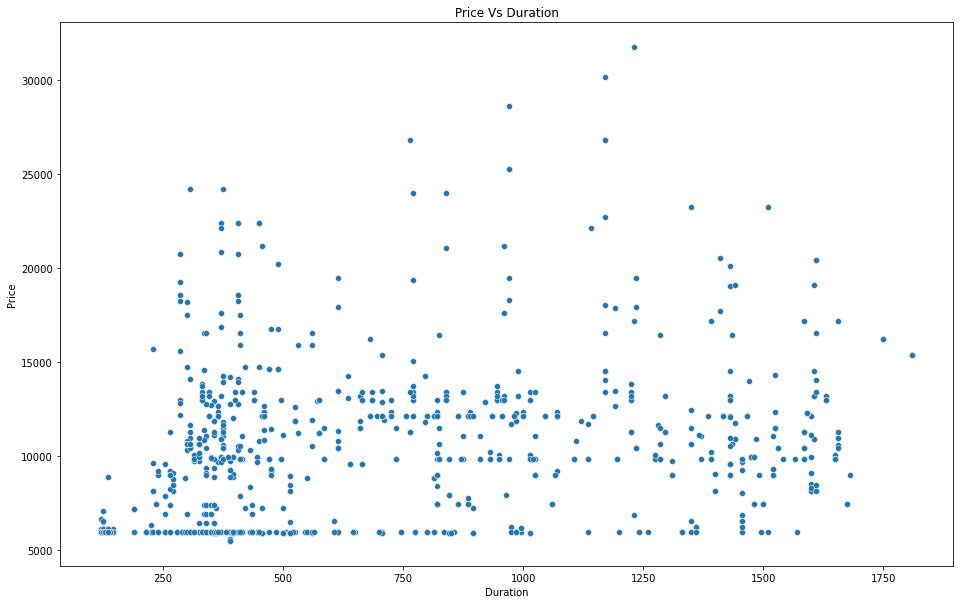

In [190]:
plt.figure(figsize=[16,10])
plt.title("Price Vs Duration")
sns.scatterplot(x='Duration',y='Price',data=df2)
plt.show()

As such no relationship can be established between the independent variable (Duration)amd dependent variable (Price).

Time taken by flights to reach to the destination ranges from 120 minutes to 1810 minutes.

In [191]:
df2[df2['Duration']==120]['Price'].value_counts()

5955    21
6165     2
6060     2
6690     1
Name: Price, dtype: int64

The price of a ticket falls in the range of 5955 rs to 6690 rs for the flight duration of 120 minutes.

In [192]:
df2['total_stops'].value_counts()

1-stop      1433
non-stop     345
2+-stop       18
Name: total_stops, dtype: int64

Most of the flights i.e are having 1 stop during the journey between source and destination amd the least records i.e 0.01%(18 out of 1796) are for the flights having more than 2 stops.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_stops', ylabel='count'>

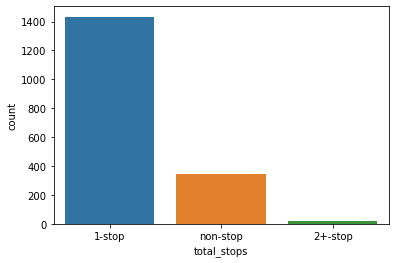

In [193]:
sns.countplot(df2['total_stops'])

In [194]:
df2['total_stops']=df2['total_stops'].replace({'1-stop':'1','non-stop':'0','2+-stop':'2'})

Replacing 1 stop, non stop ,2+-stop with 1 ,0 and 2.

In [195]:
df2['total_stops']=df2['total_stops'].astype('int')

Text(0, 0.5, 'Price of ticket')

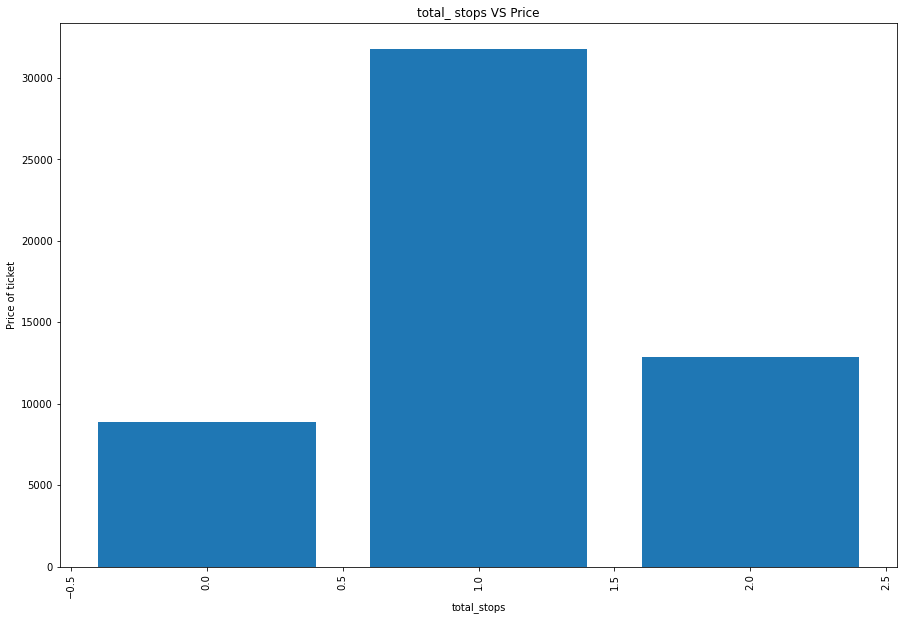

In [196]:
plt.figure(figsize = (15, 10))
plt.title('total_ stops VS Price')
plt.bar(df2['total_stops'], df2['Price'])
plt.xticks(rotation = 90)
plt.xlabel('total_stops')
plt.ylabel('Price of ticket')

Non stops flights are cheaper as compared to the flights having one stop.

In [197]:
pd.crosstab(df2['total_stops'],df2['Price'],margins=True)

Price        5496  5607  5953  5954  5955  5956  6060  6165  6166  6271  ...  \
total_stops                                                              ...   
0               0     0     0    58   267     4     3     8     0     0  ...   
1               4     1    68   155   231     0     0     0     0     4  ...   
2               0     0     0     0     0     0     0     0     4     0  ...   
All             4     1    68   213   498     4     3     8     4     4  ...   

Price        22755  23281  24015  24225  25275  26850  28635  30210  31785  \
total_stops                                                                  
0                0      0      0      0      0      0      0      0      0   
1                1      2      2      2      2      3      1      1      1   
2                0      0      0      0      0      0      0      0      0   
All              1      2      2      2      2      3      1      1      1   

Price         All  
total_stops        
0             345  
1            1433  
2              18  
All          1796  

[4 rows x 179 columns]

There are 4 flights with one stop having minimum fare of 5496 Rs.

There is a single flight with one stop having maximum fare of 31785 Rs.

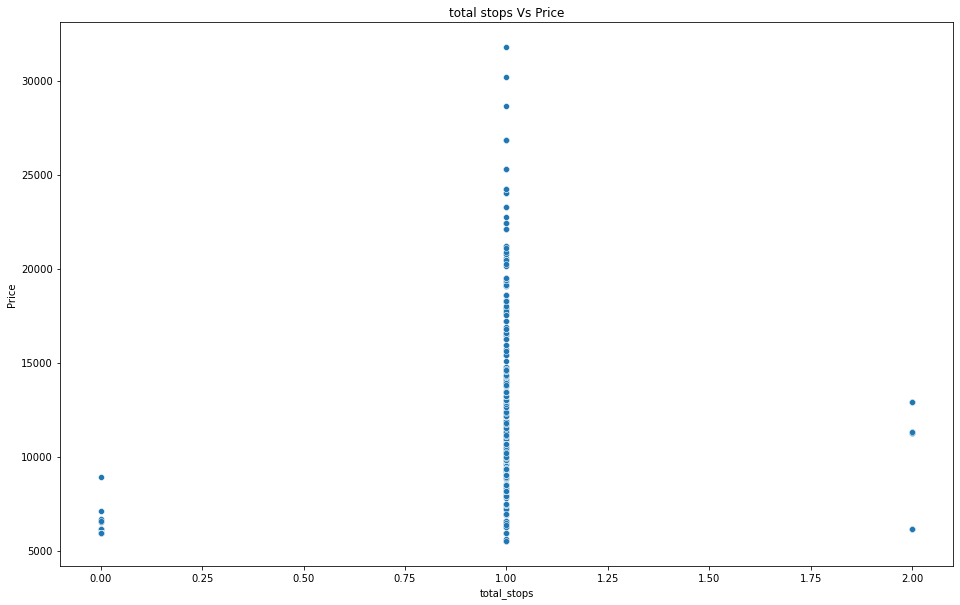

In [198]:
plt.figure(figsize=[16,10])
plt.title("total stops Vs Price")
sns.scatterplot(x='total_stops',y='Price',data=df2)
plt.show()

In [199]:
df2[df2['total_stops']==0]['Price'].max()

8895

The maximum fare is 8895 Rs for the non stop flights.

In [200]:
df2[df2['total_stops']==2]['Price'].max()

12885

The maximum fare is 12885 Rs for one of the flight with 2 stops.

In [201]:
df2[df2['total_stops']==2]['Price'].min()

6166

The minimum fare is 6166 Rs for one of the flight with 2 stops.

In [202]:
df2

journey_date Airline_name source Destination  Duration  total_stops  \
0      05/10/2021       Indigo  Delhi      Mumbai       390            1   
1      05/10/2021     GO FIRST  Delhi      Mumbai       125            0   
2      05/10/2021     GO FIRST  Delhi      Mumbai       125            0   
3      05/10/2021     GO FIRST  Delhi      Mumbai       125            0   
4      05/10/2021     SpiceJet  Delhi      Mumbai       120            0   
5      05/10/2021       Indigo  Delhi      Mumbai       125            0   
6      05/10/2021       Indigo  Delhi      Mumbai       125            0   
7      05/10/2021       Indigo  Delhi      Mumbai       125            0   
8      05/10/2021       Indigo  Delhi      Mumbai       130            0   
9      05/10/2021       Indigo  Delhi      Mumbai       130            0   
10     05/10/2021       Indigo  Delhi      Mumbai       130            0   
11     05/10/2021       Indigo  Delhi      Mumbai       135            0   
12     05/10/2021       Indigo  Delhi      Mumbai       135            0   
13     05/10/2021     SpiceJet  Delhi      Mumbai       140            0   
14     05/10/2021       Indigo  Delhi      Mumbai       145            0   
15     05/10/2021      Vistara  Delhi      Mumbai       130            0   
16     05/10/2021      Vistara  Delhi      Mumbai       130            0   
17     05/10/2021      Vistara  Delhi      Mumbai       130            0   
18     05/10/2021      Vistara  Delhi      Mumbai       135            0   
19     05/10/2021      Vistara  Delhi      Mumbai       135            0   
20     05/10/2021      Vistara  Delhi      Mumbai       140            0   
21     05/10/2021      Vistara  Delhi      Mumbai       140            0   
22     05/10/2021      Vistara  Delhi      Mumbai       140            0   
23     05/10/2021    Air India  Delhi      Mumbai       125            0   
24     05/10/2021    Air India  Delhi      Mumbai       130            0   
25     05/10/2021    Air India  Delhi      Mumbai       130            0   
26     05/10/2021    Air India  Delhi      Mumbai       135            0   
27     05/10/2021      AirAsia  Delhi      Mumbai       455            1   
28     05/10/2021      AirAsia  Delhi      Mumbai       500            1   
29     05/10/2021      AirAsia  Delhi      Mumbai       515            1   
30     05/10/2021      AirAsia  Delhi      Mumbai       705            1   
31     05/10/2021      AirAsia  Delhi      Mumbai       845            1   
32     05/10/2021      AirAsia  Delhi      Mumbai       895            1   
33     05/10/2021     GO FIRST  Delhi      Mumbai       290            1   
34     05/10/2021     GO FIRST  Delhi      Mumbai       295            1   
35     05/10/2021     GO FIRST  Delhi      Mumbai       300            1   
36     05/10/2021     GO FIRST  Delhi      Mumbai       355            1   
37     05/10/2021     GO FIRST  Delhi      Mumbai       405            1   
38     05/10/2021     GO FIRST  Delhi      Mumbai       415            1   
39     05/10/2021     GO FIRST  Delhi      Mumbai       450            1   
40     05/10/2021     GO FIRST  Delhi      Mumbai       545            1   
41     05/10/2021     GO FIRST  Delhi      Mumbai       650            1   
42     05/10/2021     GO FIRST  Delhi      Mumbai       800            1   
43     05/10/2021     GO FIRST  Delhi      Mumbai       815            1   
44     05/10/2021    Air India  Delhi      Mumbai       190            1   
45     05/10/2021    Air India  Delhi      Mumbai       215            1   
46     05/10/2021       Indigo  Delhi      Mumbai       240            1   
47     05/10/2021       Indigo  Delhi      Mumbai       255            1   
48     05/10/2021       Indigo  Delhi      Mumbai       295            1   
49     05/10/2021       Indigo  Delhi      Mumbai       315            1   
50     05/10/2021       Indigo  Delhi      Mumbai       325            1   
51     05/10/2021       Indigo  Delhi      Mumbai    

In [203]:
df2['Journey_date']=df2['journey_date'].str.split('/').str[0]
df2['Journey_month']=df2['journey_date'].str.split('/').str[1]

In [204]:
df2['Journey_date']=df2['Journey_date'].astype('int')
df2['Journey_month']=df2['Journey_month'].astype('int')

In [205]:
df2.drop('journey_date',axis=1,inplace=True)

In [206]:
df2

Airline_name source Destination  Duration  total_stops  Price  \
0          Indigo  Delhi      Mumbai       390            1   5496   
1        GO FIRST  Delhi      Mumbai       125            0   5954   
2        GO FIRST  Delhi      Mumbai       125            0   5954   
3        GO FIRST  Delhi      Mumbai       125            0   5954   
4        SpiceJet  Delhi      Mumbai       120            0   5955   
5          Indigo  Delhi      Mumbai       125            0   5955   
6          Indigo  Delhi      Mumbai       125            0   5955   
7          Indigo  Delhi      Mumbai       125            0   5955   
8          Indigo  Delhi      Mumbai       130            0   5955   
9          Indigo  Delhi      Mumbai       130            0   5955   
10         Indigo  Delhi      Mumbai       130            0   5955   
11         Indigo  Delhi      Mumbai       135            0   5955   
12         Indigo  Delhi      Mumbai       135            0   5955   
13       SpiceJet  Delhi      Mumbai       140            0   5955   
14         Indigo  Delhi      Mumbai       145            0   5955   
15        Vistara  Delhi      Mumbai       130            0   5955   
16        Vistara  Delhi      Mumbai       130            0   5955   
17        Vistara  Delhi      Mumbai       130            0   5955   
18        Vistara  Delhi      Mumbai       135            0   5955   
19        Vistara  Delhi      Mumbai       135            0   5955   
20        Vistara  Delhi      Mumbai       140            0   5955   
21        Vistara  Delhi      Mumbai       140            0   5955   
22        Vistara  Delhi      Mumbai       140            0   5955   
23      Air India  Delhi      Mumbai       125            0   5955   
24      Air India  Delhi      Mumbai       130            0   5955   
25      Air India  Delhi      Mumbai       130            0   5955   
26      Air India  Delhi      Mumbai       135            0   5955   
27        AirAsia  Delhi      Mumbai       455            1   5953   
28        AirAsia  Delhi      Mumbai       500            1   5953   
29        AirAsia  Delhi      Mumbai       515            1   5953   
30        AirAsia  Delhi      Mumbai       705            1   5953   
31        AirAsia  Delhi      Mumbai       845            1   5953   
32        AirAsia  Delhi      Mumbai       895            1   5953   
33       GO FIRST  Delhi      Mumbai       290            1   5954   
34       GO FIRST  Delhi      Mumbai       295            1   5954   
35       GO FIRST  Delhi      Mumbai       300            1   5954   
36       GO FIRST  Delhi      Mumbai       355            1   5954   
37       GO FIRST  Delhi      Mumbai       405            1   5954   
38       GO FIRST  Delhi      Mumbai       415            1   5954   
39       GO FIRST  Delhi      Mumbai       450            1   5954   
40       GO FIRST  Delhi      Mumbai       545            1   5954   
41       GO FIRST  Delhi      Mumbai       650            1   5954   
42       GO FIRST  Delhi      Mumbai       800            1   5954   
43       GO FIRST  Delhi      Mumbai       815            1   5954   
44      Air India  Delhi      Mumbai       190            1   5955   
45      Air India  Delhi      Mumbai       215            1   5955   
46         Indigo  Delhi      Mumbai       240            1   5955   
47         Indigo  Delhi      Mumbai       255            1   5955   
48         Indigo  Delhi      Mumbai       295            1   5955   
49         Indigo  Delhi      Mumbai       315            1   5955   
50         Indigo  Delhi      Mumbai       325            1   5955   
51         Indigo  Delhi      Mumbai       350            1   5955   
52         Indigo  Delhi      Mumbai       355            1   5955   
53         Indigo  Delhi      Mumbai       360            1   5955   
54         Indigo  Delhi      Mumbai       365            1   5955   
55         Indigo  Delhi      Mumbai       370            1   5955   
56         Indi

In [207]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline_name    1796 non-null   object
 1   source          1796 non-null   object
 2   Destination     1796 non-null   object
 3   Duration        1796 non-null   int64 
 4   total_stops     1796 non-null   int32 
 5   Price           1796 non-null   int32 
 6   depart_hour     1796 non-null   int64 
 7   depart_min      1796 non-null   int64 
 8   arrival_hour    1796 non-null   int64 
 9   arrival_minute  1796 non-null   int64 
 10  Journey_date    1796 non-null   int32 
 11  Journey_month   1796 non-null   int32 
dtypes: int32(4), int64(5), object(3)
memory usage: 140.4+ KB


In [208]:
numerical_category=df2.select_dtypes(include=[np.number])

Duration


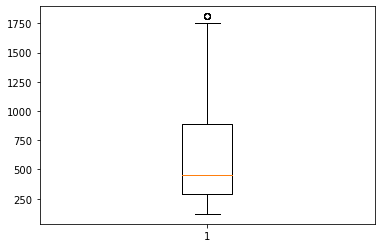

total_stops


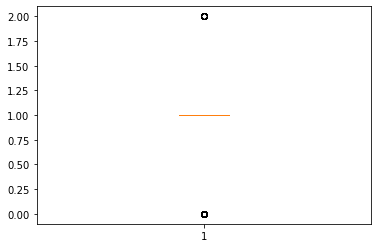

Price


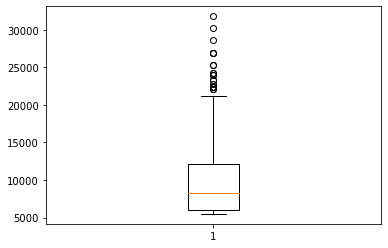

depart_hour


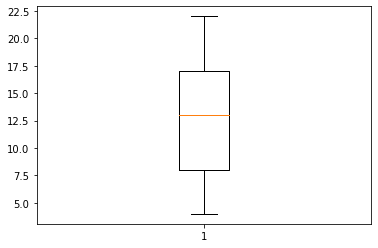

depart_min


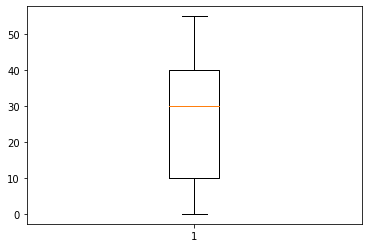

arrival_hour


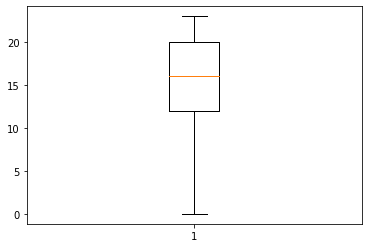

arrival_minute


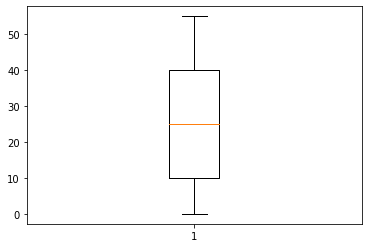

Journey_date


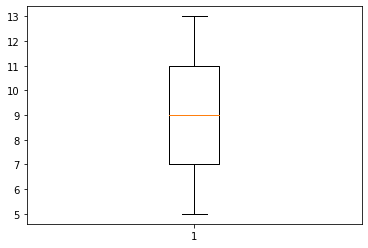

Journey_month


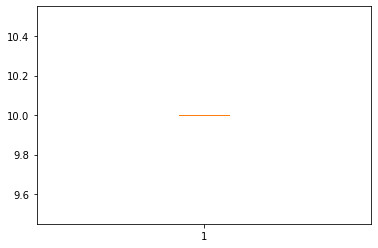

In [210]:
for i in numerical_category.columns:
    print(i)
    plt.boxplot(df2[i])
    plt.show()

There are outliers present in independent features named as duration, total_stops. Further, i am not removing it as the total_stops can be 1 or more and the same is for duration feature as the duration to reach from source to destination can be more than 1750 minutes.

{'bodies': [<matplotlib.collections.PolyCollection at 0x24aea788eb0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x24aeb2de9d0>,
 'cmins': <matplotlib.collections.LineCollection at 0x24aeb2a3820>,
 'cbars': <matplotlib.collections.LineCollection at 0x24aea7fae20>}

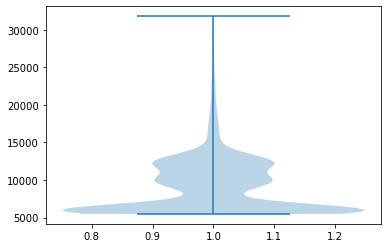

In [211]:
plt.violinplot(df2['Price'])

The feature price is not uniformly distributed as per the above plot.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

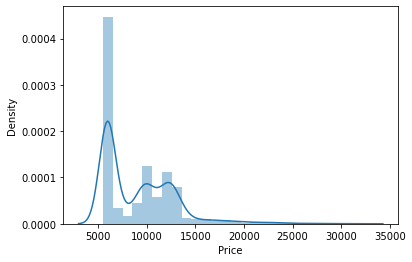

In [212]:
sns.distplot(df2['Price'])

In [213]:
df2.describe()

Duration  total_stops         Price  depart_hour   depart_min  \
count  1796.000000  1796.000000   1796.000000  1796.000000  1796.000000   
mean    616.191537     0.817929   9107.776726    12.930958    26.753898   
std     442.669668     0.411169   3731.933751     4.915296    17.301605   
min     120.000000     0.000000   5496.000000     4.000000     0.000000   
25%     290.000000     1.000000   5955.000000     8.000000    10.000000   
50%     455.000000     1.000000   8212.500000    13.000000    30.000000   
75%     890.000000     1.000000  12150.000000    17.000000    40.000000   
max    1810.000000     2.000000  31785.000000    22.000000    55.000000   

       arrival_hour  arrival_minute  Journey_date  Journey_month  
count   1796.000000     1796.000000   1796.000000         1796.0  
mean      15.732183       24.270601      9.192650           10.0  
std        5.242752       16.577571      2.568433            0.0  
min        0.000000        0.000000      5.000000           10.0  
25%       12.000000       10.000000      7.000000           10.0  
50%       16.000000       25.000000      9.000000           10.0  
75%       20.000000       40.000000     11.000000           10.0  
max       23.000000       55.000000     13.000000           10.0

The dependent feature price whcih is the target variable is having right tailed skewness as mean is greater than median but as it is target variable there is no point in removing skewness from it.

In [214]:
df2.skew()

Duration          0.822944
total_stops      -1.206754
Price             1.483523
depart_hour       0.070631
depart_min       -0.040267
arrival_hour     -0.487459
arrival_minute    0.138137
Journey_date     -0.093633
Journey_month     0.000000
dtype: float64

The feature duration and total_stops are having skewness greater than 0.5 which needs to be treated. 

There is a less correlation of the target variable i.e Price with the independent variables like depart_hour, depart_min,arrival_hour and arrival_min,jiurney_date and journey_month.

I am dropping Journey_month as it is showing 0 correlation with target variable Price.

In [215]:
df3=df2.copy()

In [88]:
#df3.drop('Journey_month',axis=1,inplace=True)

In [216]:
from sklearn.preprocessing import power_transform

In [217]:
df3['Duration']=power_transform(df3['Duration'].values.reshape(-1,1))
df3['total_stops']=power_transform(df3['total_stops'].values.reshape(-1,1))

In [218]:
df3.skew()

Duration         -0.046080
total_stops       0.280533
Price             1.483523
depart_hour       0.070631
depart_min       -0.040267
arrival_hour     -0.487459
arrival_minute    0.138137
Journey_date     -0.093633
Journey_month     0.000000
dtype: float64

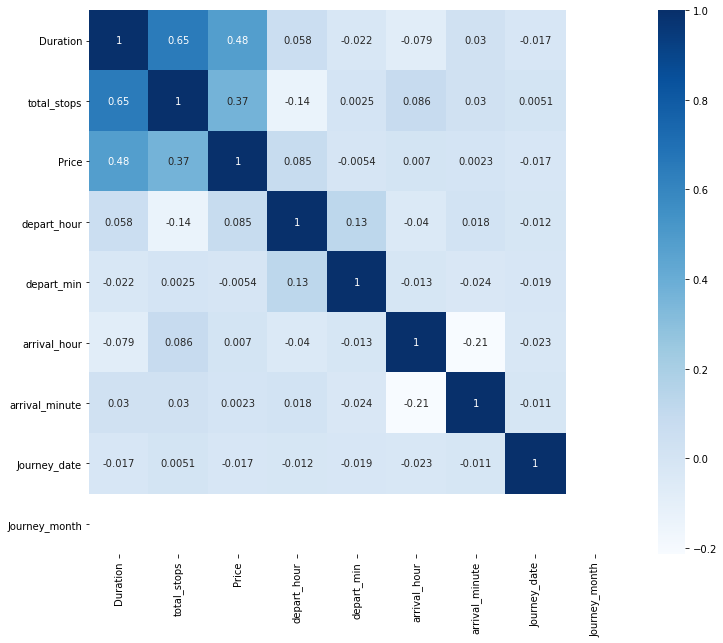

In [219]:
plt.figure(figsize=[12,10])
sns.heatmap(df3.corr(),cmap='Blues',annot=True)
plt.show()

There is a less correlation of the target variable i.e Price with the independent variables like depart_hour, depart_min,arrival_hour and arrival_min,journey_date and journey_month.

I am dropping Journey_month as the entire data is extracted for the month of October so there is no point in carrying this feature forward.

In [220]:
df3.drop('Journey_month',axis=1,inplace=True)

In [221]:
categorical_columns=df3.select_dtypes(include=[np.object])

In [222]:
categorical_columns

Airline_name source Destination
0          Indigo  Delhi      Mumbai
1        GO FIRST  Delhi      Mumbai
2        GO FIRST  Delhi      Mumbai
3        GO FIRST  Delhi      Mumbai
4        SpiceJet  Delhi      Mumbai
5          Indigo  Delhi      Mumbai
6          Indigo  Delhi      Mumbai
7          Indigo  Delhi      Mumbai
8          Indigo  Delhi      Mumbai
9          Indigo  Delhi      Mumbai
10         Indigo  Delhi      Mumbai
11         Indigo  Delhi      Mumbai
12         Indigo  Delhi      Mumbai
13       SpiceJet  Delhi      Mumbai
14         Indigo  Delhi      Mumbai
15        Vistara  Delhi      Mumbai
16        Vistara  Delhi      Mumbai
17        Vistara  Delhi      Mumbai
18        Vistara  Delhi      Mumbai
19        Vistara  Delhi      Mumbai
20        Vistara  Delhi      Mumbai
21        Vistara  Delhi      Mumbai
22        Vistara  Delhi      Mumbai
23      Air India  Delhi      Mumbai
24      Air India  Delhi      Mumbai
25      Air India  Delhi      Mumbai
26      Air India  Delhi      Mumbai
27        AirAsia  Delhi      Mumbai
28        AirAsia  Delhi      Mumbai
29        AirAsia  Delhi      Mumbai
30        AirAsia  Delhi      Mumbai
31        AirAsia  Delhi      Mumbai
32        AirAsia  Delhi      Mumbai
33       GO FIRST  Delhi      Mumbai
34       GO FIRST  Delhi      Mumbai
35       GO FIRST  Delhi      Mumbai
36       GO FIRST  Delhi      Mumbai
37       GO FIRST  Delhi      Mumbai
38       GO FIRST  Delhi      Mumbai
39       GO FIRST  Delhi      Mumbai
40       GO FIRST  Delhi      Mumbai
41       GO FIRST  Delhi      Mumbai
42       GO FIRST  Delhi      Mumbai
43       GO FIRST  Delhi      Mumbai
44      Air India  Delhi      Mumbai
45      Air India  Delhi      Mumbai
46         Indigo  Delhi      Mumbai
47         Indigo  Delhi      Mumbai
48         Indigo  Delhi      Mumbai
49         Indigo  Delhi      Mumbai
50         Indigo  Delhi      Mumbai
51         Indigo  Delhi      Mumbai
52         Indigo  Delhi      Mumbai
53         Indigo  Delhi      Mumbai
54         Indigo  Delhi      Mumbai
55         Indigo  Delhi      Mumbai
56         Indigo  Delhi      Mumbai
57         Indigo  Delhi      Mumbai
58         Indigo  Delhi      Mumbai
59         Indigo  Delhi      Mumbai
60         Indigo  Delhi      Mumbai
61       SpiceJet  Delhi      Mumbai
62       SpiceJet  Delhi      Mumbai
63       SpiceJet  Delhi      Mumbai
64         Indigo  Delhi      Mumbai
65        Vistara  Delhi      Mumbai
66        Vistara  Delhi      Mumbai
67         Indigo  Delhi      Mumbai
68        Vistara  Delhi      Mumbai
69         Indigo  Delhi      Mumbai
70         Indigo  Delhi      Mumbai
71         Indigo  Delhi      Mumbai
72      Air India  Delhi      Mumbai
73        AirAsia  Delhi      Mumbai
74         Indigo  Delhi      Mumbai
75      Air India  Delhi      Mumbai
76      Air India  Delhi      Mumbai
77      Air India  Delhi      Mumbai
78      Air India  Delhi      Mumbai
79      Air India  Delhi      Mumbai
80        Vistara  Delhi      Mumbai
81      Air India  Delhi      Mumbai
82        Vistara  Delhi      Mumbai
83        Vistara  Delhi      Mumbai
84      Air India  Delhi      Mumbai
85        Vistara  Delhi      Mumbai
86        Vistara  Delhi      Mumbai
87        Vistara  Delhi      Mumbai
88       SpiceJet  Delhi      Mumbai
89      Air India  Delhi      Mumbai
90         Indigo  Delhi      Mumbai
91        Vistara  Delhi      Mumbai
92      Air India  Delhi      Mumbai
93      Air India  Delhi      Mumbai
94        Vistara  Delhi      Mumbai
95      Air India  Delhi      Mumbai
96        Vistara  Delhi      Mumbai
97        Vistara  Delhi      Mumbai
98      Air India  Delhi      Mumbai
99      Air India  Delhi      Mumbai
100       Vistara  Delhi      Mumbai
101       Vistara  Delhi      Mumbai
102        Indigo  Delhi      Mumbai
103     Air India  Delhi      Mumbai
104     Air India  Delhi      Mumbai
105       Vistara  Delhi      Mumbai
106       Vistara  Delhi      Mumbai
107     A

In [223]:
from sklearn.preprocessing import LabelEncoder
for j in categorical_columns.columns:
    le=LabelEncoder()
    df3[j]=le.fit_transform(df3[j])

In [224]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Airline_name    1796 non-null   int32  
 1   source          1796 non-null   int32  
 2   Destination     1796 non-null   int32  
 3   Duration        1796 non-null   float64
 4   total_stops     1796 non-null   float64
 5   Price           1796 non-null   int32  
 6   depart_hour     1796 non-null   int64  
 7   depart_min      1796 non-null   int64  
 8   arrival_hour    1796 non-null   int64  
 9   arrival_minute  1796 non-null   int64  
 10  Journey_date    1796 non-null   int32  
dtypes: float64(2), int32(5), int64(4)
memory usage: 119.4 KB


# All the features are converted into integer and float Datatype

In [225]:
x=df3.drop('Price',axis=1)
y=df3['Price']

In [226]:
se=StandardScaler()
x=se.fit_transform(x)

Applying Standard scaler first before splitting the data into train and test.

# Machine Learning

In [227]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=161)

In [228]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print(mean_absolute_error(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))
    


2139.8286155991286
2817.936424894604
0.2910610854053074


In [229]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
pred1=dtc.predict(x_test)
print(mean_absolute_error(y_test,pred1))
print(mean_squared_error(y_test,pred1))
print(np.sqrt(mean_squared_error(y_test,pred1)))
print(r2_score(y_test,pred1))

731.4832962138084
4143228.3830734966
2035.4921721965666
0.6300991685528705


In [230]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
pred2=knr.predict(x_test)
print(mean_absolute_error(y_test,pred2))
print(mean_squared_error(y_test,pred2))
print(np.sqrt(mean_squared_error(y_test,pred2)))
print(r2_score(y_test,pred2))

1395.1247216035636
5426288.755545657
2329.439579715614
0.515549581927803


In [231]:
svr=SVR()
svr.fit(x_train,y_train)
pred3=svr.predict(x_test)
print(mean_absolute_error(y_test,pred3))
print(mean_squared_error(y_test,pred3))
print(np.sqrt(mean_squared_error(y_test,pred3)))
print(r2_score(y_test,pred3))

2788.521873968447
11860882.190240588
3443.9631516961076
-0.05892067205135687


In [232]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred4=rfr.predict(x_test)
print(mean_absolute_error(y_test,pred4))
print(mean_squared_error(y_test,pred4))
print(np.sqrt(mean_squared_error(y_test,pred4)))
print(r2_score(y_test,pred4))

856.428819599109
3114607.7900057905
1764.8251443148101
0.7219327768989143


In [233]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
pred5=ada.predict(x_test)
print(mean_absolute_error(y_test,pred5))
print(mean_squared_error(y_test,pred5))
print(np.sqrt(mean_squared_error(y_test,pred5)))
print(r2_score(y_test,pred5))

3105.5266120462315
13605319.642879967
3688.5389577554915
-0.2146612695947996


In [234]:
gr=GradientBoostingRegressor()
gr.fit(x_train,y_train)
pred6=ada.predict(x_test)
print(mean_absolute_error(y_test,pred6))
print(mean_squared_error(y_test,pred6))
print(np.sqrt(mean_squared_error(y_test,pred6)))
print(r2_score(y_test,pred6))

3105.5266120462315
13605319.642879967
3688.5389577554915
-0.2146612695947996


In [235]:
from sklearn.linear_model import Lasso,Ridge

In [236]:
ls=Lasso()
ls.fit(x_train,y_train)
pred7=ls.predict(x_test)
print(mean_absolute_error(y_test,pred7))
print(mean_squared_error(y_test,pred7))
print(np.sqrt(mean_squared_error(y_test,pred7)))
print(r2_score(y_test,pred7))

2139.7172378661453
7939803.55564747
2817.7657027594523
0.2911469836518602


In [237]:
rd=Ridge()
rd.fit(x_train,y_train)
pred8=rd.predict(x_test)
print(mean_absolute_error(y_test,pred8))
print(mean_squared_error(y_test,pred8))
print(np.sqrt(mean_squared_error(y_test,pred8)))
print(r2_score(y_test,pred8))

2139.8498302838893
7940801.373629819
2817.942755562969
0.2910579000515423


# Checking out cross_val_Score

In [238]:
from sklearn.model_selection import cross_val_score

In [239]:
score=cross_val_score(lr,x,y,cv=5)
print(score.mean())

0.23536294858745183


In [240]:
score1=cross_val_score(dtc,x,y,cv=5)
print(score1.mean())

0.4212923471571964


In [241]:
score2=cross_val_score(knr,x,y,cv=5)
print(score2.mean())

0.48183607022503405


In [242]:
score3=cross_val_score(svr,x,y,cv=5)
print(score3.mean())

-0.08819193164429436


In [243]:
score4=cross_val_score(rfr,x,y,cv=5)
print(score4.mean())

0.6054331872465263


In [244]:
score5=cross_val_score(ada,x,y,cv=5)
print(score5.mean())

-0.11811051334095583


In [245]:
score6=cross_val_score(gr,x,y,cv=5)
print(score6.mean())

0.4634312591609813


In [246]:
score7=cross_val_score(ls,x,y,cv=5)
print(score7.mean())

0.2354750344893591


In [247]:
score8=cross_val_score(rd,x,y,cv=5)
print(score8.mean())

0.235373677997126


# The difference between r2_Score and cross_val score is minimum for KNeighborsRegrssor so KNeighbors Regressor is my best model.

# Will do hypertuning of KNeighbors Regressor to improve r2_score

# Hypertuning

In [119]:
params={'n_neighbors':[5,10,15,20],'weights':['uniform','distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

In [120]:
re=RandomizedSearchCV(knr,param_distributions=params,n_jobs=-1,cv=5)
re.fit(x_train,y_train)
re.best_params_

{'weights': 'distance', 'n_neighbors': 5, 'algorithm': 'ball_tree'}

In [121]:
knr1=KNeighborsRegressor(n_neighbors=5,weights='distance',algorithm='ball_tree')
knr1.fit(x_train,y_train)
pred9=knr1.predict(x_test)
print(mean_absolute_error(y_test,pred9))
print(mean_squared_error(y_test,pred9))
print(np.sqrt(mean_squared_error(y_test,pred9)))
print(r2_score(y_test,pred9))

1258.463819358367
4732445.9431311665
2175.4185673408156
0.5774947631913439


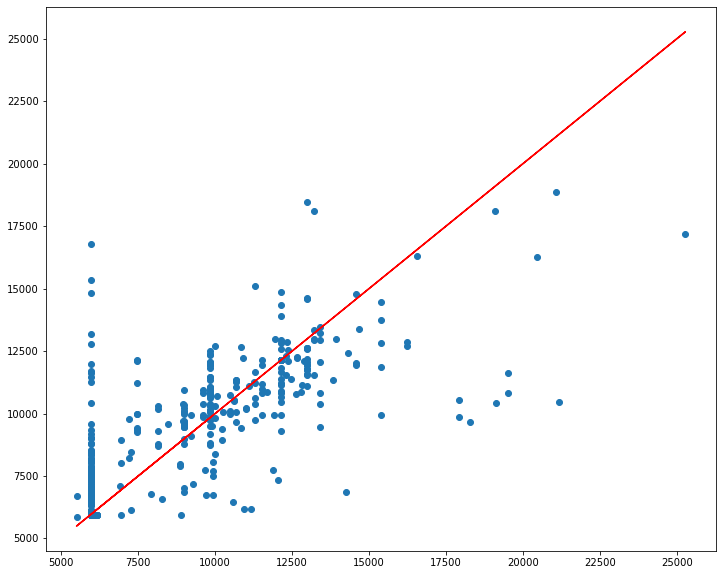

In [122]:
plt.figure(figsize=[12,10])
plt.scatter(y_test,pred9)
plt.plot(y_test,y_test,color='r')
plt.show()

# KNeighborsRegressor is my best model with r2_Score of 58%

In [123]:
import joblib

In [124]:
joblib.dump(knr1,'flightprice.obj')

['flightprice.obj']

In [125]:
joblib.load('flightprice.obj')

KNeighborsRegressor(algorithm='ball_tree', weights='distance')

Saving the model using joblib